<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Taller_2_EDA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución del taller introducción de EDA

In [ ]:
!pip install statsmodels

In [ ]:
!pip install wquantiles

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic-train.csv')

In [9]:
print(df.info())
print(df.describe())
print(df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   23.783389    0.523008   
std     257.353842    0.48659

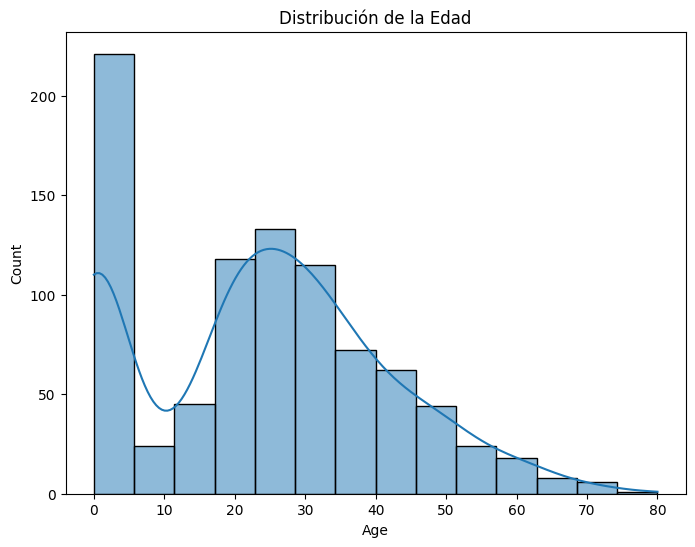

In [10]:
# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.show()

La distribución de edades parece ser ligeramente sesgada a la derecha, con la mayor cantidad de pasajeros entre 20 y 30 años. También se observa un pico para niños menores de 6 años.

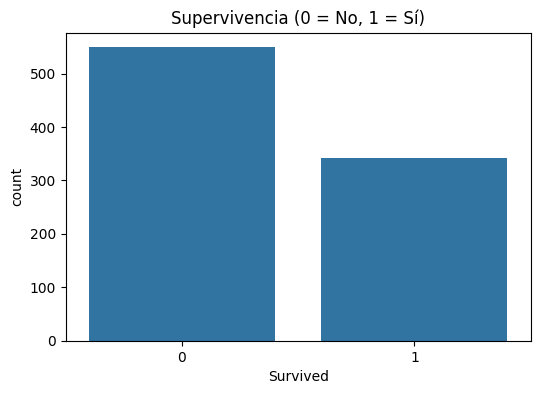

In [6]:
# Gráfico de barras de la supervivencia
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Supervivencia (0 = No, 1 = Sí)')
plt.show()

In [11]:
total_pasajeros = len(df)
sobrevivientes = df['Survived'].sum()
porcentaje_supervivencia = (sobrevivientes / total_pasajeros) * 100

print(f"Porcentaje de supervivencia: {porcentaje_supervivencia:.2f}%")

Porcentaje de supervivencia: 38.38%


Este gráfico, junto con el porcentaje de supervivencia del 38%, nos muestra que la mayoría de los pasajeros del Titanic no sobrevivieron al hundimiento. La tasa de supervivencia fue relativamente baja.

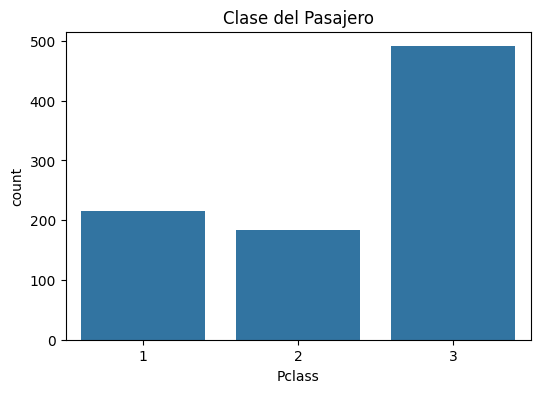

In [7]:
# Gráfico de barras de la clase del pasajero
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Clase del Pasajero')
plt.show()

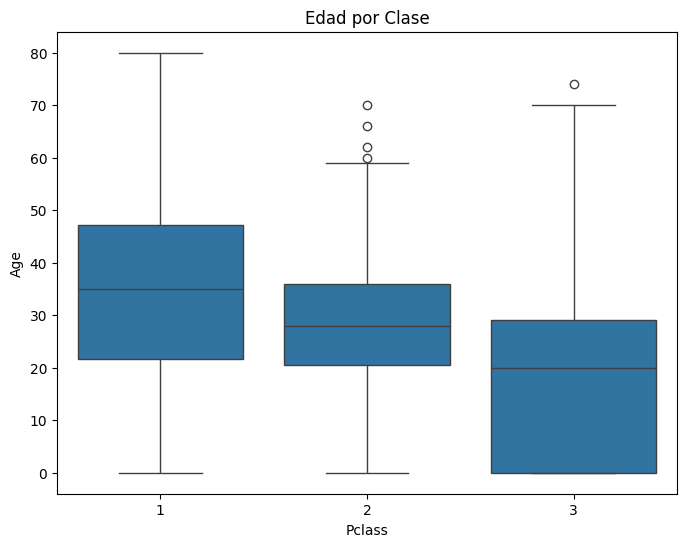

In [8]:
# Boxplot de la edad por clase
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Edad por Clase')
plt.show()


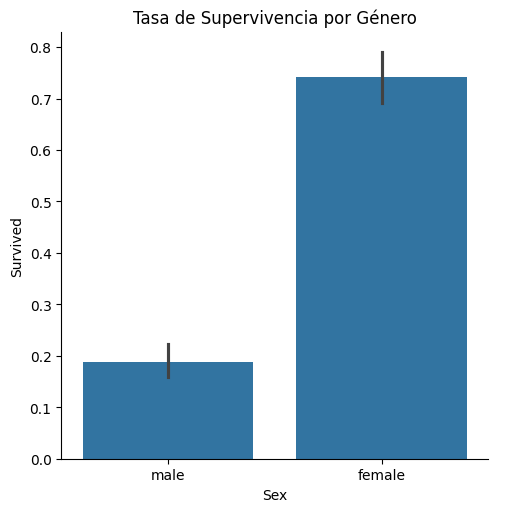

In [12]:
sns.catplot(x='Sex', y='Survived', kind='bar', data=df)
plt.title('Tasa de Supervivencia por Género')
plt.show()

In [13]:
genero_supervivencia = pd.crosstab(df['Sex'], df['Survived'])
genero_supervivencia['Porcentaje_Supervivencia'] = (genero_supervivencia[1] / (genero_supervivencia[0] + genero_supervivencia[1])) * 100
print(genero_supervivencia)

Survived    0    1  Porcentaje_Supervivencia
Sex                                         
female     81  233                 74.203822
male      468  109                 18.890815


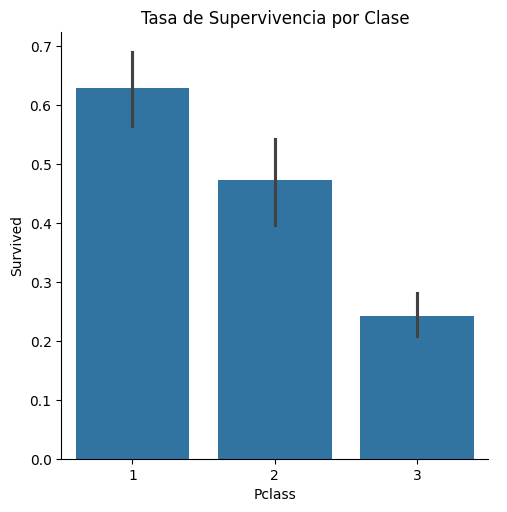

In [14]:
sns.catplot(x='Pclass', y='Survived', kind='bar', data=df)
plt.title('Tasa de Supervivencia por Clase')
plt.show()

In [15]:
clase_supervivencia = pd.crosstab(df['Pclass'], df['Survived'])
clase_supervivencia['Porcentaje_Supervivencia'] = (clase_supervivencia[1] / (clase_supervivencia[0] + clase_supervivencia[1])) * 100
print(clase_supervivencia)

Survived    0    1  Porcentaje_Supervivencia
Pclass                                      
1          80  136                 62.962963
2          97   87                 47.282609
3         372  119                 24.236253


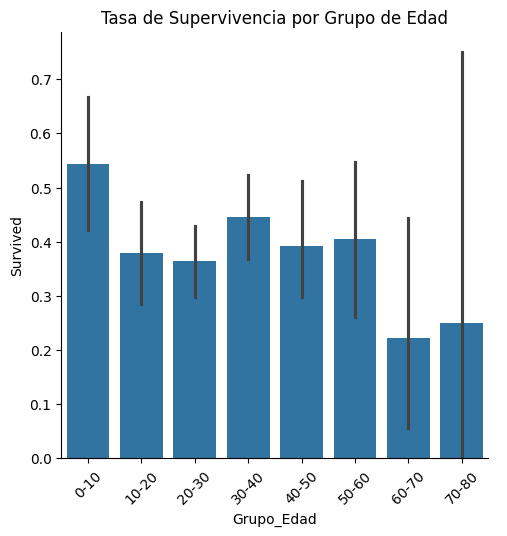

In [16]:
df['Grupo_Edad'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
sns.catplot(x='Grupo_Edad', y='Survived', kind='bar', data=df)
plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

In [17]:
edad_supervivencia = pd.crosstab(df['Grupo_Edad'], df['Survived'])
edad_supervivencia['Porcentaje_Supervivencia'] = (edad_supervivencia[1] / (edad_supervivencia[0] + edad_supervivencia[1])) * 100
print(edad_supervivencia)

Survived      0   1  Porcentaje_Supervivencia
Grupo_Edad                                   
0-10         26  31                 54.385965
10-20        72  44                 37.931034
20-30       147  84                 36.363636
30-40        86  69                 44.516129
40-50        51  33                 39.285714
50-60        25  17                 40.476190
60-70        14   4                 22.222222
70-80         3   1                 25.000000


Para determinar si Jack habría sobrevivido, debemos analizar sus condiciones de viaje. Jack viajaba en tercera clase, la cual tenía el menor porcentaje de supervivencia (24.23%) en comparación con las otras dos clases. Además, Jack tenía entre 20 y 30 años, una edad común para viajar, pero con una tasa de supervivencia relativamente baja (36.36%), la tercera peor en términos de rango de edad. Finalmente, Jack era hombre, un grupo con la menor tasa de supervivencia (18.89%). En resumen, todas las condiciones de viaje de Jack disminuían sus probabilidades de supervivencia. Por lo tanto, estadísticamente, es muy probable que no hubiera sobrevivido, incluso si hubiera tenido acceso a la mitad de una puerta.

In [18]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Grupo_Edad     184
dtype: int64


In [4]:
df['Age'] = df['Age'].fillna(0).astype(int)

print(df['Survived'].dtype)
print(df['Pclass'].dtype)

if df['Survived'].dtype != 'int64':
    df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').fillna(0).astype(int)
if df['Pclass'].dtype != 'int64':
    df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce').fillna(0).astype(int)

print(df.info())


int64
int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB
None


Cómo podemos llenar los datos nulos?
Eliminación, simplemente eliminar las filas o columnas que contienen valores nulos.
valores estadísticos,Reemplazar los valores nulos con la media, mediana o moda de la columna.


Los datos disponibles son suficientes para generar un modelo mínimo viable?
Con las variables exploradas (edad, género, clase), la limpieza de datos realizada (relleno de valores nulos en "Age") y el análisis exploratorio básico, los datos procesados son suficientes para generar un modelo mínimo viable (MVM) para predecir la supervivencia en el Titanic. Se recomienda usar un modelo simple como la regresión logística, codificar variables categóricas, dividir los datos en conjuntos de entrenamiento y prueba, y evaluar el rendimiento del modelo. Para mejorar el modelo, se pueden añadir más variables, probar otros modelos o ajustar hiperparámetros. Recuerda que un MVM es un punto de partida y puede ser mejorado con más datos y análisis.

In [19]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Grupo_Edad
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False,True
889,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Grupo_Edad,184
Embarked,2
Survived,0
PassengerId,0
Sex,0
Name,0
Pclass,0
Age,0
Ticket,0


In [22]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [23]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Grupo_Edad,0.206510
Embarked,0.002245
Survived,0.000000
PassengerId,0.000000
Sex,0.000000
Name,0.000000
Pclass,0.000000
Age,0.000000
Ticket,0.000000


In [24]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Grupo_Edad,184,0.206510
Embarked,2,0.002245
Survived,0,0.000000
PassengerId,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Age,0,0.000000
Ticket,0,0.000000


In [25]:
def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt



1.   Define la función llamada plot_learning_curve y sus parámetros.
2.   Crea una nueva figura para el gráfico
3.   Establece el título del gráfico utilizando el parámetro title.
4.   Si se proporciona ylim, establece los límites del eje y.
5.   Establece las etiquetas de los ejes x e y.
6.   Llama a la función learning_curve de scikit-learn para obtener las puntuaciones de entrenamiento y validación para diferentes tamaños de conjuntos de entrenamiento.
7.   Calcula la media de las puntuaciones de entrenamiento para cada tamaño de conjunto de entrenamiento.
8.   Calcula la desviación estándar de las puntuaciones de entrenamiento.
9.   Hacen lo mismo para las puntuaciones de validación.
10.  Agrega una cuadrícula al gráfico.
11.  Rellena el área entre la media +/- la desviación estándar para las puntuaciones de entrenamiento (en rojo) y las puntuaciones de validación (en verde).
12.  Traza las puntuaciones medias de entrenamiento y validación como líneas con marcadores.
13.  Agrega una leyenda al gráfico.
14.  Devuelve el objeto plt (matplotlib.pyplot) para que se pueda mostrar o guardar el gráfico.



